In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/mem_result_without_s2_v_0.5.pkl','rb'))
params={'beta0':-1, 'beta1':1, 'mu_x':0.5, 's2_x':1/36, 's2_ep':0.35, 's2_v':1/30}
heights={'beta0':4, 'beta1':2, 'mu_x':50, 's2_x':80, 's2_ep':25, 's2_v':80}

beta0 = params['beta0']
beta1 = params['beta1']
mu_x = params['mu_x']
s2_x = params['s2_x']
s2_ep = params['s2_ep']
s2_v = params['s2_v']

n = 1000
np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
w = x+v
y = beta0 + beta1*x + ep

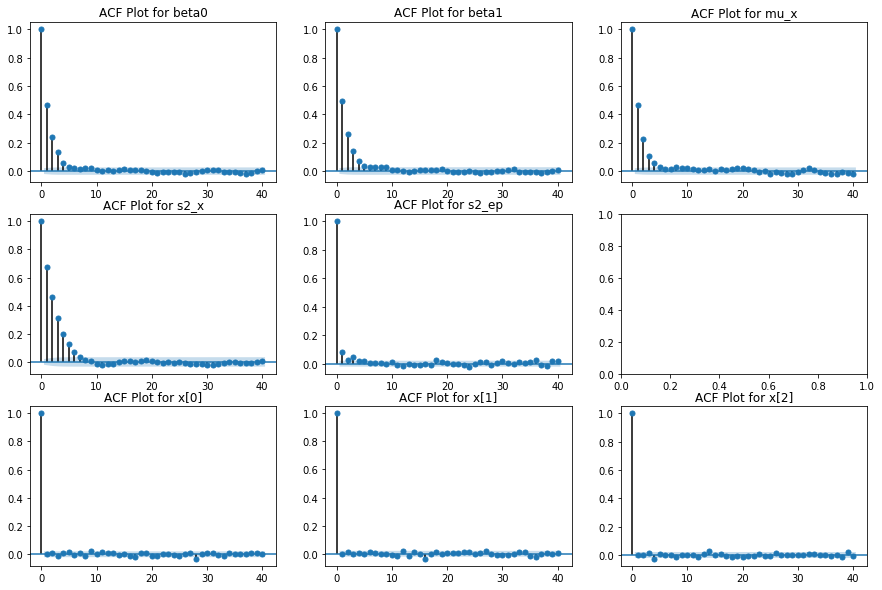

In [13]:
burnin = 1000

fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        
        if i == 2:
            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin:], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            if key == 's2_v': continue
            plot_acf(np.array(mcmc.params[key])[burnin:], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
plt.savefig('autocorr.png')
plt.show()

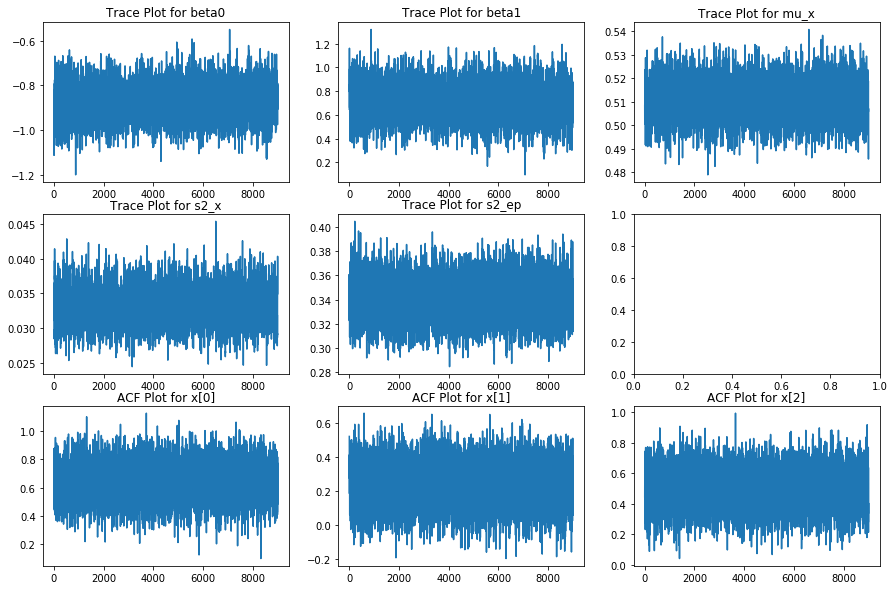

In [14]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if i == 2:
            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin:])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            if key == 's2_v': continue
            ax[i][j].plot(mcmc.params[key][burnin:])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
plt.savefig('traceplot.png')
plt.show()

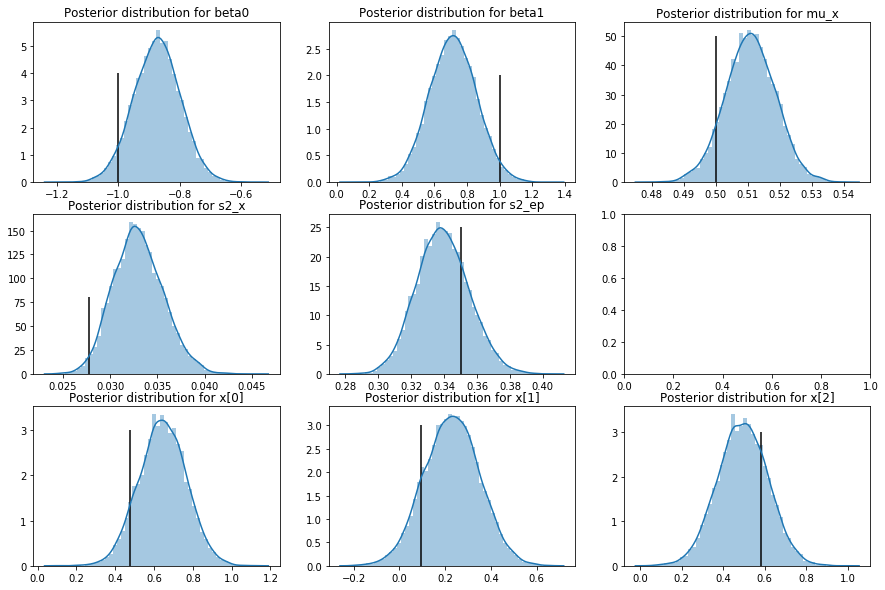

In [15]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if i == 2:
            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin:], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(x[j] ,0, 3)
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
        else:
            key = list(mcmc.params.keys())[a]
            if key == 's2_v': continue
            sns.distplot(mcmc.params[key][burnin:], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(params[key] ,0, heights[key])
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
        a += 1
plt.savefig('density.png')
plt.show()

In [12]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [13]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -1.08,  -0.703
beta1:  0.39,  1.11
mu_x:  0.496,  0.528
s2_x:  0.024,  0.042
s2_ep:  0.308,  0.373
s2_v:  0.025,  0.043
x[0]:  0.394,  0.897
x[1]:  -0.008,  0.507
x[2]:  0.247,  0.744


In [15]:
1/30

0.03333333333333333

In [17]:
x[0], x[1], x[2]

(0.47446063970548474, 0.09458191455881448, 0.5846640561025632)